In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import metrics

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


voice.csv is a dataset for male / female voice classification from Kaggle (https://www.kaggle.com/primaryobjects/voicegender).

It has 3168 samples and 20 features (besides class), all of which are numerical - good candidate for SVM

In [21]:
data = pd.read_csv('voice.csv')

FileNotFoundError: File b'voice.csv' does not exist

In [3]:
data_size = len(data.index)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# code categories to 0/1
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)

# normalize data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

3168

Now, define a classic SVM problem and solve it for different values of C

In [8]:
# Number of sample points for graph, and the range of C

TRIALS = 100
C_vals = np.logspace(-4.5, 1, TRIALS)

acc = np.zeros(TRIALS)
for i in range(TRIALS):    
    if (i % 10 == 0):
        print(i,end='/')

    svc=SVC(kernel='linear', C=C_vals[i])
    svc.fit(X_train,y_train)
    y_pred=svc.predict(X_test)
    acc[i] = metrics.accuracy_score(y_test,y_pred)


0/1/2/3/4/5/6/7/8/9/10/11/12/13/14/15/16/17/18/19/20/21/22/23/24/25/26/27/28/29/30/31/32/33/34/35/36/37/38/39/40/41/42/43/44/45/46/47/48/49/50/51/52/53/54/55/56/57/58/59/60/61/62/63/64/65/66/67/68/69/70/71/72/73/74/75/76/77/78/79/80/81/82/83/84/85/86/87/88/89/90/91/92/93/94/95/96/97/98/99/

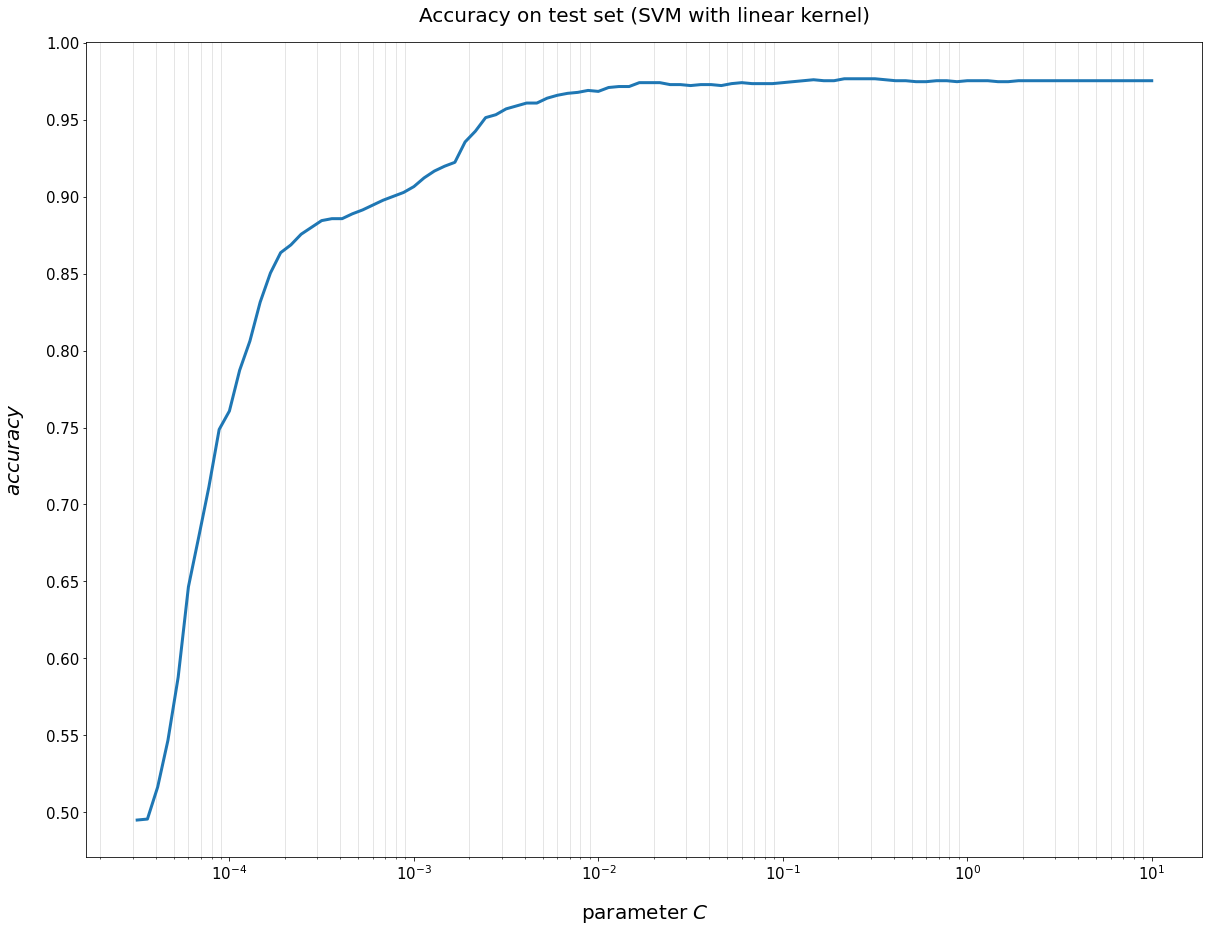

In [19]:
fig, ax = plt.subplots(figsize=[20,15])

ax.minorticks_on()
ax.grid(True, which='both')

ax.xaxis.set_major_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.05))

ax.xaxis.set_minor_locator(AutoMinorLocator(0.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.1))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle='-',lw=0.5)

plt.plot(C_vals, acc, lw=3)
plt.grid()
plt.xscale('log')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.ylabel(r"$accuracy$", fontsize=20, labelpad=20)
plt.xlabel(r"parameter $C$", fontsize=20, labelpad=20)
plt.title('Accuracy on test set (SVM with linear kernel)', fontsize=20, pad=20)


plt.savefig("images/accuracy_c.png")

plt.show()